# Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('Aemf1.csv')

In [3]:
df.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  int64  
 9   Business                     41714 non-null  int64  
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  int64  
 13  City Center (km)

In [5]:
df.shape

(41714, 19)

In [6]:
df.isnull().sum()

City                           0
Price                          0
Day                            0
Room Type                      0
Shared Room                    0
Private Room                   0
Person Capacity                0
Superhost                      0
Multiple Rooms                 0
Business                       0
Cleanliness Rating             0
Guest Satisfaction             0
Bedrooms                       0
City Center (km)               0
Metro Distance (km)            0
Attraction Index               0
Normalised Attraction Index    0
Restraunt Index                0
Normalised Restraunt Index     0
dtype: int64

In [7]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41709    False
41710    False
41711    False
41712    False
41713    False
Length: 41714, dtype: bool

In [8]:
# checking unique values
columns_to_check= ['City', 'Room Type', 'Person Capacity']
for column in columns_to_check:
    unique_values = df[column].unique()
    print("Unique", column, "values:", unique_values)  

Unique City values: ['Amsterdam' 'Athens' 'Barcelona' 'Berlin' 'Budapest' 'Lisbon' 'Paris'
 'Rome' 'Vienna']
Unique Room Type values: ['Private room' 'Entire home/apt' 'Shared room']
Unique Person Capacity values: [2. 4. 3. 6. 5.]


In [9]:
df.columns

Index(['City', 'Price', 'Day', 'Room Type', 'Shared Room', 'Private Room',
       'Person Capacity', 'Superhost', 'Multiple Rooms', 'Business',
       'Cleanliness Rating', 'Guest Satisfaction', 'Bedrooms',
       'City Center (km)', 'Metro Distance (km)', 'Attraction Index',
       'Normalised Attraction Index', 'Restraunt Index',
       'Normalised Restraunt Index'],
      dtype='object')

In [10]:
# summary statistics
columns_to_describe = ['Price', 'Cleanliness Rating', 'Guest Satisfaction', 
                       'City Center (km)', 'Metro Distance (km)', 'Attraction Index', 
                       'Normalised Attraction Index', 'Restraunt Index', 'Normalised Restraunt Index']
df[columns_to_describe].describe()

,Price,Cleanliness Rating,Guest Satisfaction,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
count,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000
mean,260.094423,9.442274,93.103179,2.679792,0.603921,293.905990,11.719658,626.692618,25.553590
std,279.408493,0.889173,8.141745,1.996684,0.706206,235.750055,8.379161,520.644720,18.484572
min,34.779339,2.000000,20.000000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757
25%,144.016085,9.000000,90.000000,1.275913,0.236693,124.371614,5.510735,210.459574,11.132052
50%,203.819274,10.000000,95.000000,2.253237,0.391220,228.920599,9.951086,519.583509,21.814414
75%,297.373358,10.000000,98.000000,3.584489,0.678702,394.000201,15.467009,860.708156,36.821356
max,18545.450285,10.000000,100.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000


# Data Visualisation 

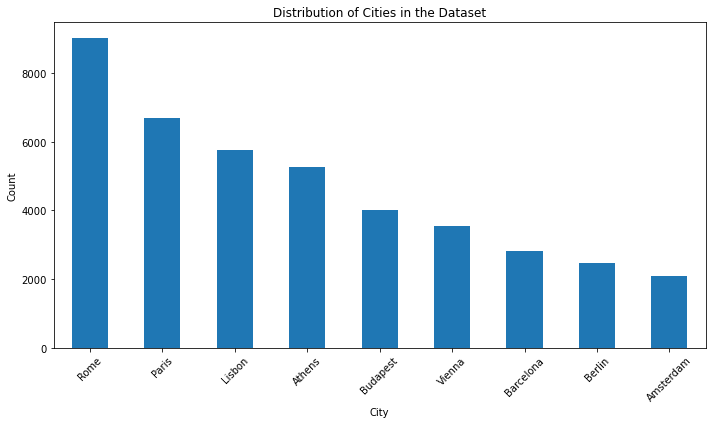

In [11]:
# distribution of City
city_counts= df['City'].value_counts()

plt.figure(figsize=(10,6))
city_counts.plot(kind= 'bar')
plt.title('Distribution of Cities in the Dataset')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

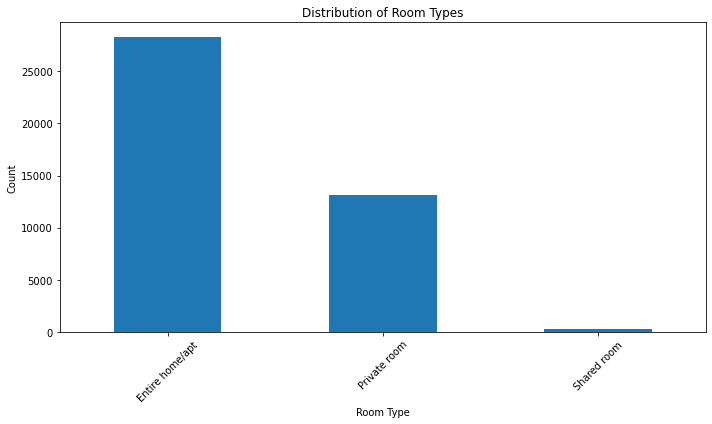

In [12]:
# distribution of Room type
room_type_counts= df['Room Type'].value_counts()

plt.figure(figsize=(10,6))
room_type_counts.plot(kind= 'bar')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

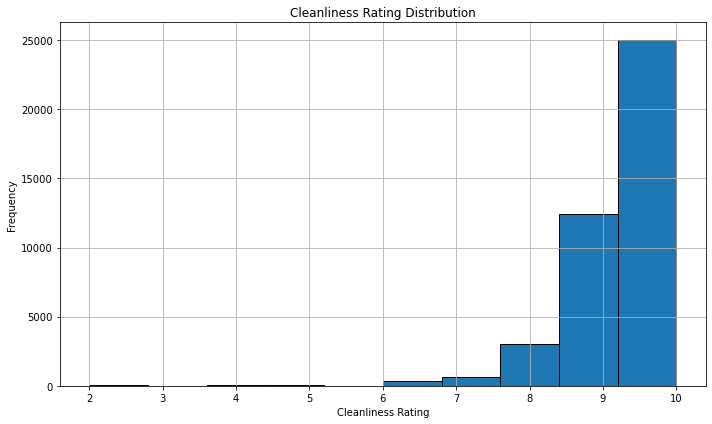

In [13]:
# Create a histogram for the Cleanliness Rating column
plt.figure(figsize=(10, 6))
plt.hist(df['Cleanliness Rating'], bins=10, edgecolor='black')
plt.title('Cleanliness Rating Distribution')
plt.xlabel('Cleanliness Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

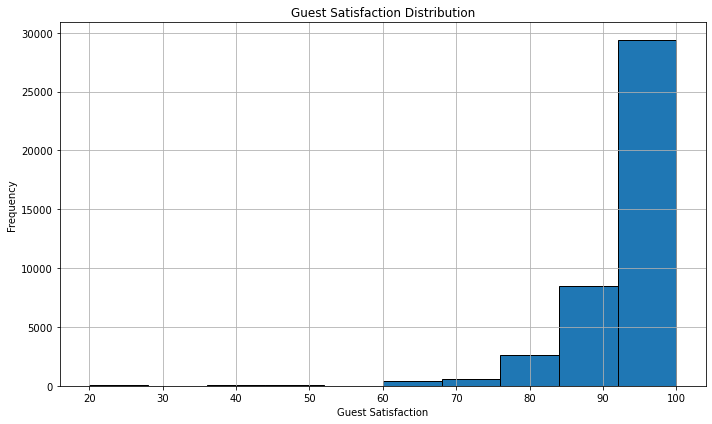

In [14]:
# Create a histogram for the Guest Satisfaction Column
plt.figure(figsize=(10, 6))
plt.hist(df['Guest Satisfaction'], bins=10, edgecolor='black')
plt.title('Guest Satisfaction Distribution')
plt.xlabel('Guest Satisfaction')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

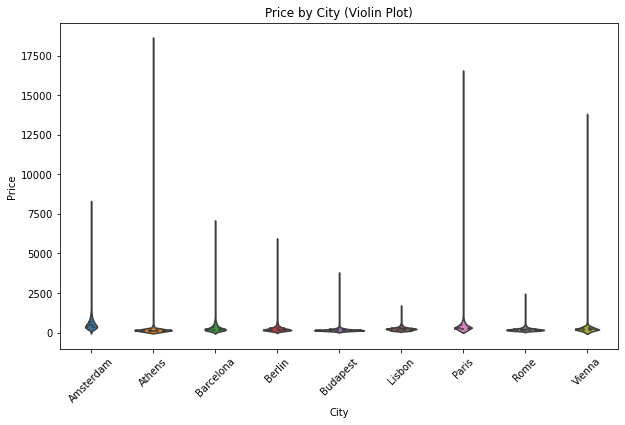

In [15]:
# Violin plot of Price by City
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='City', y='Price', inner='quartile')
plt.title('Price by City (Violin Plot)')
plt.xlabel('City')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

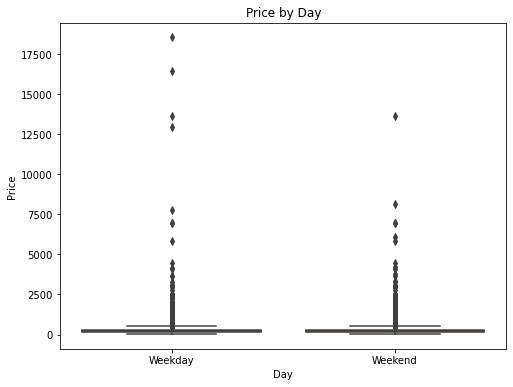

In [16]:
# Box plot of Price by Day
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Day', y='Price')
plt.title('Price by Day')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

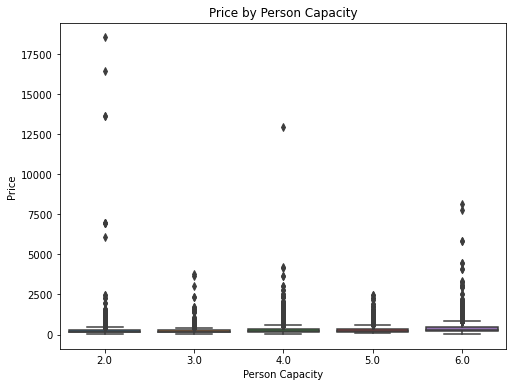

In [17]:
# Box plot of Price by Person Capacity
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Person Capacity', y='Price')
plt.title('Price by Person Capacity')
plt.xlabel('Person Capacity')
plt.ylabel('Price')
plt.show()

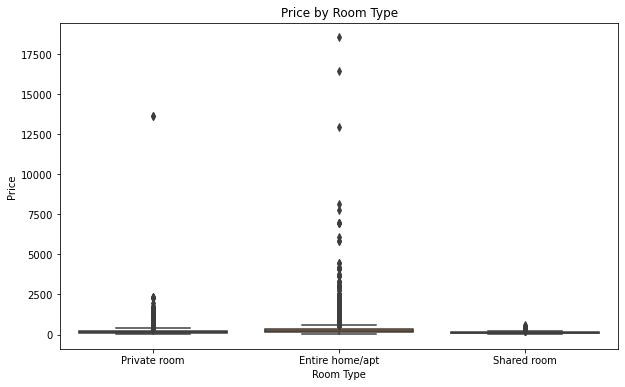

In [18]:
# Box plot of Price by Room Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Room Type', y='Price')
plt.title('Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

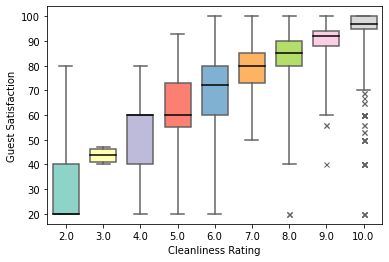

In [19]:
# cleanliness and guest satisfaction
sns.boxplot(data=df, 
            x='Cleanliness Rating', 
            y='Guest Satisfaction', 
            palette='Set3',
            saturation=1,
            width=0.7,
            whis=5,
            medianprops={"color": "black"},
            flierprops={"marker": "x"});

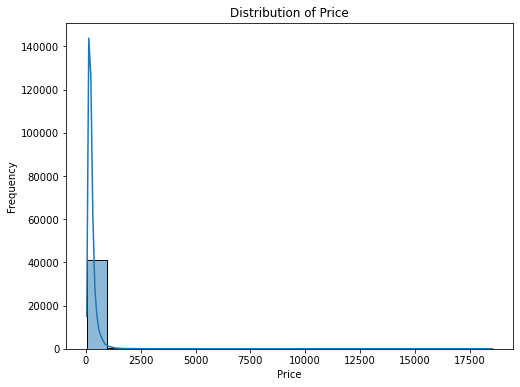

In [20]:
# Distribution of Price
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Price', bins=20, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

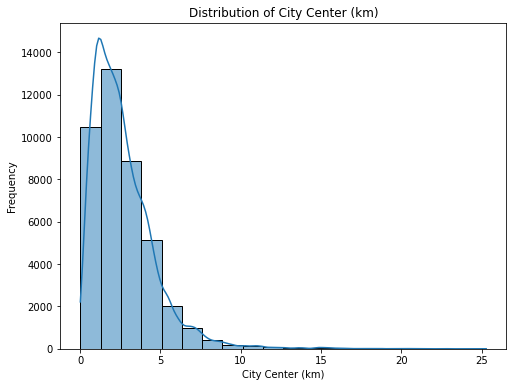

In [21]:
# Distribution of City Center (km)
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='City Center (km)', bins=20, kde=True)
plt.title('Distribution of City Center (km)')
plt.xlabel('City Center (km)')
plt.ylabel('Frequency')
plt.show()

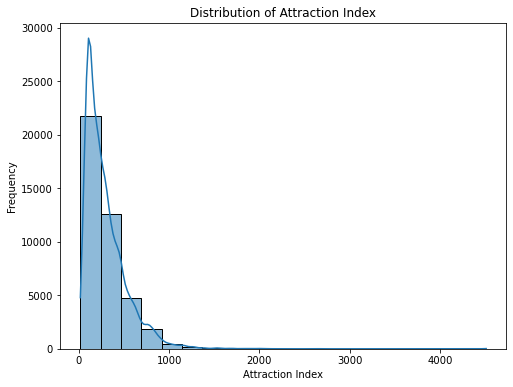

In [22]:
# Distribution of Attraction Index
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Attraction Index', bins=20, kde=True)
plt.title('Distribution of Attraction Index')
plt.xlabel('Attraction Index')
plt.ylabel('Frequency')
plt.show()

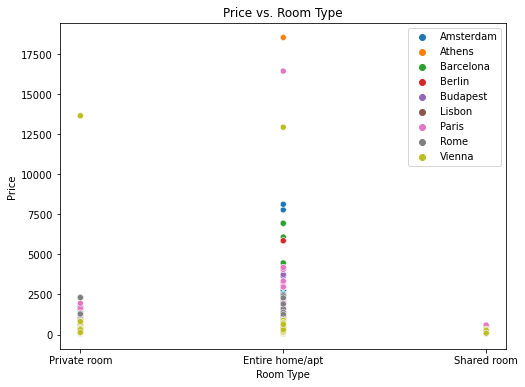

In [23]:
# scatter plot between price and room type
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Room Type', y='Price', hue='City')
plt.title('Price vs. Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.legend()
plt.show()

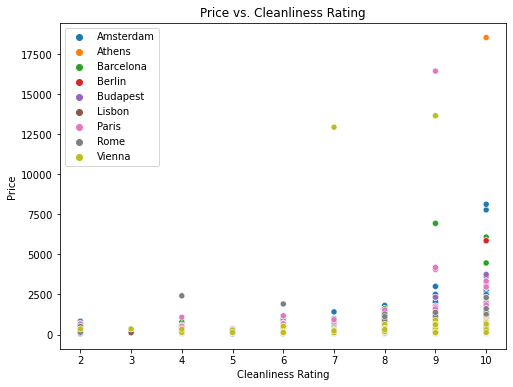

In [24]:
# Scatter plot of Price vs. Cleanliness Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Cleanliness Rating', y='Price', hue='City')
plt.title('Price vs. Cleanliness Rating')
plt.xlabel('Cleanliness Rating')
plt.ylabel('Price')
plt.legend()
plt.show()

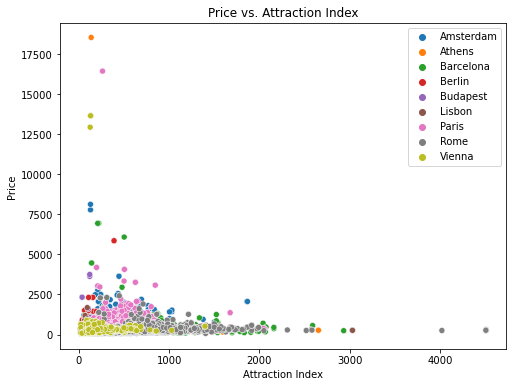

In [25]:
# Scatter plot of Price vs. Attraction Index
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Attraction Index', y='Price', hue='City')
plt.title('Price vs. Attraction Index')
plt.xlabel('Attraction Index')
plt.ylabel('Price')
plt.legend()
plt.show()

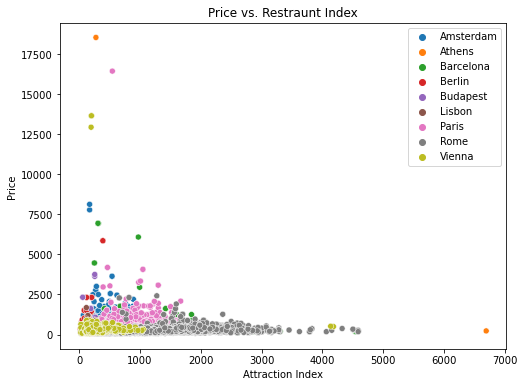

In [26]:
# Scatter plot of Price vs. Restraunt Index
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Restraunt Index', y='Price', hue='City')
plt.title('Price vs. Restraunt Index')
plt.xlabel('Attraction Index')
plt.ylabel('Price')
plt.legend()
plt.show()

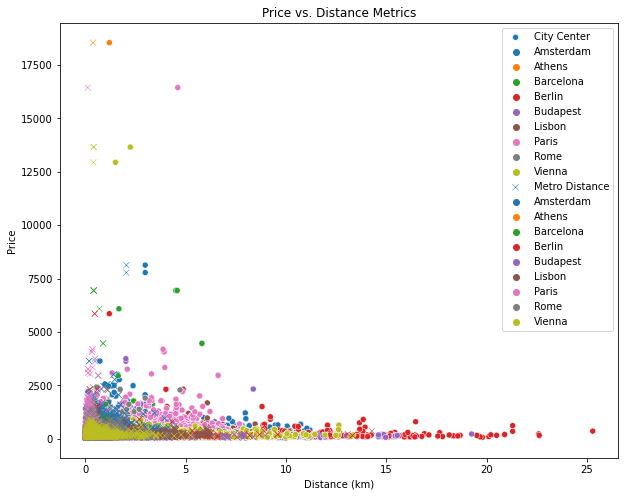

In [27]:
# Scatter plot of Price vs. City Center (km) and Metro Distance (km)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='City Center (km)', y='Price', hue='City', label='City Center')
sns.scatterplot(data=df, x='Metro Distance (km)', y='Price', hue='City', marker='x', label='Metro Distance')
plt.title('Price vs. Distance Metrics')
plt.xlabel('Distance (km)')
plt.ylabel('Price')
plt.legend()
plt.show()

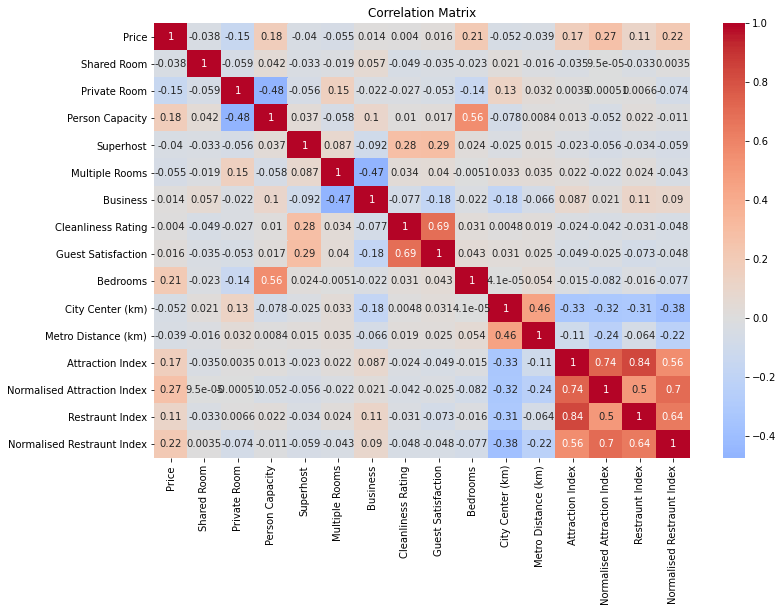

In [28]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Feature Engineering

In [29]:
# Selecting relevant features
selected_features = [
    'Price',
    'City Center (km)',
    'Metro Distance (km)',
    'Cleanliness Rating',
    'Guest Satisfaction',
    'Bedrooms',
    'Attraction Index',
    'Restraunt Index'
]

# Creating a new DataFrame with selected features
selected_df = df[selected_features]

print(selected_df.head())

        Price  City Center (km)  Metro Distance (km)  Cleanliness Rating  \
0  194.033698          5.022964             2.539380                10.0   
1  344.245776          0.488389             0.239404                 8.0   
2  264.101422          5.748312             3.651621                 9.0   
3  433.529398          0.384862             0.439876                 9.0   
4  485.552926          0.544738             0.318693                10.0   

   Guest Satisfaction  Bedrooms  Attraction Index  Restraunt Index  
0                93.0         1         78.690379        98.253896  
1                85.0         1        631.176378       837.280757  
2                87.0         1         75.275877        95.386955  
3                90.0         2        493.272534       875.033098  
4                98.0         1        552.830324       815.305740  


In [30]:
# Create a new feature: Price per Person Capacity
df['Price per Person Capacity'] = df['Price'] / df['Person Capacity']

# Create a new feature: Distance Score (combination of City Center and Metro Distance)
df['Distance Score'] = df['City Center (km)'] + df['Metro Distance (km)']

print(df.head())

        City       Price      Day     Room Type  Shared Room  Private Room  \
0  Amsterdam  194.033698  Weekday  Private room        False          True   
1  Amsterdam  344.245776  Weekday  Private room        False          True   
2  Amsterdam  264.101422  Weekday  Private room        False          True   
3  Amsterdam  433.529398  Weekday  Private room        False          True   
4  Amsterdam  485.552926  Weekday  Private room        False          True   

   Person Capacity  Superhost  Multiple Rooms  Business  ...  \
0              2.0      False               1         0  ...   
1              4.0      False               0         0  ...   
2              2.0      False               0         1  ...   
3              4.0      False               0         1  ...   
4              2.0       True               0         0  ...   

   Guest Satisfaction  Bedrooms  City Center (km)  Metro Distance (km)  \
0                93.0         1          5.022964             2.539380  

# Model Building

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [32]:
# Split Data
X = selected_df.drop('Price', axis=1)  # Features
y = selected_df['Price']  # Target variable

# Split data into 70% training, 15% validation, and 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train and Validate Models

In [33]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model's performance
mae = mean_absolute_error(y_val, y_val_pred)
rmse = mean_squared_error(y_val, y_val_pred, squared=False)
r2 = r2_score(y_val, y_val_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Absolute Error: 122.07
Root Mean Squared Error: 340.39
R-squared: 0.05


# Hyperparameter Tuning

In [34]:
# Define parameter grid for random search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Perform random search
random_search = RandomizedSearchCV(rf_model, param_distributions=param_grid, n_iter=10, cv=3, random_state=42)
random_search.fit(X_train, y_train)

best_rf_model = random_search.best_estimator_

# Evaluate the best model on the validation set
y_val_pred_rf = best_rf_model.predict(X_val)

# Evaluate the model's performance
mae_rf = mean_absolute_error(y_val, y_val_pred_rf)
rmse_rf = mean_squared_error(y_val, y_val_pred_rf, squared=False)
r2_rf = r2_score(y_val, y_val_pred_rf)

print(f'Random Forest - Mean Absolute Error: {mae_rf:.2f}')
print(f'Random Forest - Root Mean Squared Error: {rmse_rf:.2f}')
print(f'Random Forest - R-squared: {r2_rf:.2f}')

Random Forest - Mean Absolute Error: 72.72
Random Forest - Root Mean Squared Error: 305.79
Random Forest - R-squared: 0.23


# Test and Finalize Model

In [35]:
# Evaluate the best model on the test set
y_test_pred_rf = best_rf_model.predict(X_test)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
rmse_test_rf = mean_squared_error(y_test, y_test_pred_rf, squared=False)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print(f'Random Forest (Test Set) - Mean Absolute Error: {mae_test_rf:.2f}')
print(f'Random Forest (Test Set) - Root Mean Squared Error: {rmse_test_rf:.2f}')
print(f'Random Forest (Test Set) - R-squared: {r2_test_rf:.2f}')

Random Forest (Test Set) - Mean Absolute Error: 68.67
Random Forest (Test Set) - Root Mean Squared Error: 217.48
Random Forest (Test Set) - R-squared: 0.32


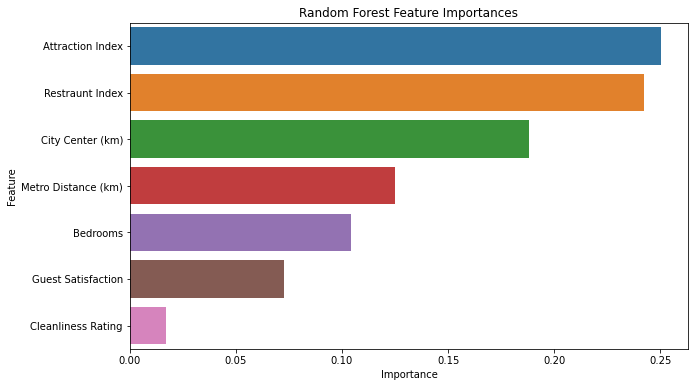

In [36]:
# Get feature importances
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()